# Analyzing Sales in R Hands On: ANOVAs
## Load in Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
avocados = pd.read_csv('avocados.csv')
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocados['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTucson?
## Data Wrangling

In [4]:
regions = ['Indianapolis', 'Orlando', 'PhoenixTucson']
avocados1 = avocados['region'].isin(regions)
avocados2 = avocados[avocados1].copy()
avocados2['region'].unique()

array(['Indianapolis', 'Orlando', 'PhoenixTucson'], dtype=object)

In [5]:
avocados3 = avocados2[['Total Volume', 'region']]

In [6]:
avocados3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 988 to 18008
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  1014 non-null   float64
 1   region        1014 non-null   object 
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


In [7]:
def recode (region):
    if region == 'Indianapolis':
        return 0
    if region == 'Orlando':
        return 1
    if region == 'PhoenixTucson':
        return 2
    
avocados3['regionR'] = avocados3['region'].apply(recode)
avocados3['regionR'].unique()

/var/folders/gh/vcsn_slj14q0_wh1ppsy70w00000gn/T/ipykernel_32988/1975897334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocados3['regionR'] = avocados3['region'].apply(recode)


array([0, 1, 2])

In [8]:
avocados4 = avocados3[['regionR', 'Total Volume']]
avocados4.head()

,regionR,Total Volume
988,0,123096.09
989,0,116353.68
990,0,125342.89
991,0,145740.44
992,0,108444.41


## Testing Assumptions
### Normality

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

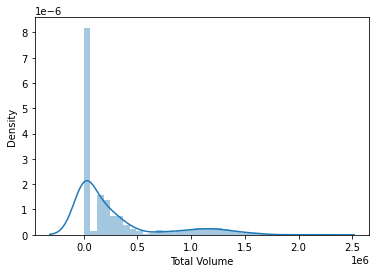

In [9]:
sns.distplot(avocados4['Total Volume'])

#### Looks like our data is positively skewed. 
#### Taking the Square Root

In [10]:
avocados4['Total VolumeSQRT'] = np.sqrt(avocados4['Total Volume'])
avocados4.head()

,regionR,Total Volume,Total VolumeSQRT
988,0,123096.09,350.850524
989,0,116353.68,341.106552
990,0,125342.89,354.037978
991,0,145740.44,381.759663
992,0,108444.41,329.308989


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total VolumeSQRT', ylabel='Density'>

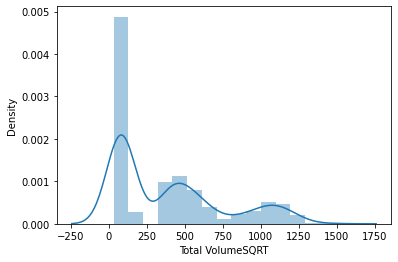

In [11]:
sns.distplot(avocados4['Total VolumeSQRT'])

In [12]:
avocados4['Total VolumeLOG'] = np.log(avocados4['Total Volume'])
avocados4.head()

,regionR,Total Volume,Total VolumeSQRT,Total VolumeLOG
988,0,123096.09,350.850524,11.720721
989,0,116353.68,341.106552,11.664390
990,0,125342.89,354.037978,11.738808
991,0,145740.44,381.759663,11.889583
992,0,108444.41,329.308989,11.593993


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total VolumeLOG', ylabel='Density'>

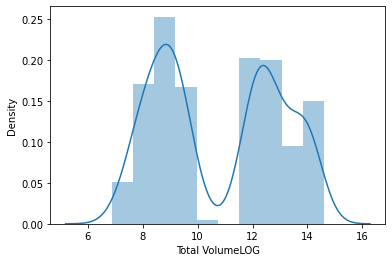

In [13]:
sns.distplot(avocados4['Total VolumeLOG'])

#### Definitely not perfect, but decent.
### Homogeneity of Variance

In [14]:
scipy.stats.bartlett(avocados4['Total VolumeLOG'], avocados4['regionR'])

BartlettResult(statistic=883.7919675933721, pvalue=3.2755760094735546e-194)

#### Our p-value is significant, which means there is a difference of variance and we do not meet this assumption. We will continue on anyway. 
### Sample Size

In [15]:
avocados4.info

<bound method DataFrame.info of        regionR  Total Volume  Total VolumeSQRT  Total VolumeLOG
988          0     123096.09        350.850524        11.720721
989          0     116353.68        341.106552        11.664390
990          0     125342.89        354.037978        11.738808
991          0     145740.44        381.759663        11.889583
992          0     108444.41        329.308989        11.593993
...        ...           ...               ...              ...
18004        2      14456.10        120.233523         9.578872
18005        2      13125.79        114.567840         9.482334
18006        2      12112.82        110.058257         9.402020
18007        2      13514.36        116.251280         9.511508
18008        2      16925.62        130.098501         9.736584

[1014 rows x 4 columns]>

#### We have 1014 rows so we meet this assumption.
### Independence. There is no test for this so it is assumed.
## Running ANOVA

In [16]:
stats.f_oneway(avocados4['Total VolumeLOG'][avocados4['regionR']==0],
                    avocados4['Total VolumeLOG'][avocados4['regionR']==1],
                    avocados4['Total VolumeLOG'][avocados4['regionR']==2])

F_onewayResult(statistic=42.49008191400619, pvalue=1.9118216626910027e-18)

#### Our p-value is significant, therefore there is a significant difference in avocado volume in the regions. However, since we did not meet an assumption this result should be taken with caution. 
## Looking at post Hocs

In [17]:
postHoc = MultiComparison(avocados4['Total VolumeLOG'],avocados4['regionR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.4292 0.0253 0.0424  0.816   True
     0      2   1.4766    0.0 1.0898 1.8634   True
     1      2   1.0474    0.0 0.6606 1.4342   True
--------------------------------------------------


#### All of the differences between the regions are significant.
## Determine Means

In [18]:
avocados4.groupby('regionR').mean()

,Total Volume,Total VolumeSQRT,Total VolumeLOG
regionR,,,
0,89536.661036,240.446599,10.157564
1,173552.378373,324.645892,10.586744
2,578826.368343,585.837880,11.634171


## Conclusion
### PhoenixTucson has the largest total volume by far (578,826), over 400,000 more than Orlando. Indianapolis has the lowest volume (89,537), almost half the total volume of Orlando (173,552). 